In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

Q.1 DATA CLEANING AND PREPROCESSING

In [3]:
df= pd.read_csv("C:/Users/Dell/Downloads/Raw data for Interview.csv")

In [7]:
Data=df.head()

In [8]:
Data

,ShipmentId,TierType,Type,ReverseShipmentId,ForwardReverseType,TotalPrice,DeliveryPincode,Status,DeliveryHub,CurrentHub,...,NumberOfAttempts,CsNotes,HubNotes,OnHoldByOpsReason,OnHoldByOpsDate,BagId,BagStatus,ConsignmentId,OrderId,ItemDescription
0,FMPP1819610045,REGULAR,PP,NaN,NORMAL_FORWARD,498,421305,Delivered,BulkHub_BHI,BulkHub_BHI,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OD428913123487126100,MITHALI HotPot chapati box/chapati case Casser...
1,FMPC2972423738,REGULAR,COD,NaN,NORMAL_FORWARD,12290,421601,Delivered,BulkHub_BHI,BulkHub_BHI,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OD428893490469098100,Godrej 8 kg Semi Automatic Top Load Washing Ma...
2,FMPC2970867951,ECONOMY,COD,NaN,NORMAL_FORWARD,1788,144004,Expected,satellitehub_JLD,BulkHub_BHI,...,0,Marked_As_RTO,NaN,NaN,NaN,NaN,NaN,NaN,OD328879078257415100,APTITUDE 30KG PVC Weight Dumbbell Set with 4 R...
3,FMPC2968732983,REGULAR,COD,NaN,NORMAL_FORWARD,934,700128,Delivered,Bulkhub_KOL10,Bulkhub_KOL10,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OD328877335539322100,Tucker 3 In 1 Convertible Dumbbells Barbell H...
4,FMPC2968930927,REGULAR,COD,NaN,NORMAL_FORWARD,574,700125,Delivered,Bulkhub_KOL10,Bulkhub_KOL10,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OD428858903532838100,APRAS Combo of Water Tank Y Type Screen Filter...


In [9]:
df= pd.DataFrame(Data)

1) Identify columns with missing values and calculate the percentage of missing values in each. 

In [11]:
#Calculate the percentage of missing values in each column

In [12]:
missing_values = df.isnull().mean()* 100

In [13]:
missing_values=missing_values[missing_values > 0] 

In [14]:
# Filter out columns with no missing values

In [15]:
missing_values

ReverseShipmentId       100.0
LogisticsPromiseDate    100.0
CsNotes                  80.0
HubNotes                100.0
OnHoldByOpsReason       100.0
OnHoldByOpsDate         100.0
BagId                   100.0
BagStatus               100.0
ConsignmentId           100.0
dtype: float64

2. Impute missing values with appropriate strategies

In [16]:
#Define imputation strategies

In [19]:
imputation_strategies={
    'TierType':df['TierType'].mode()[0],
    'ReverseShipmentId': -1,  #Impute with a specefic value indicating no reverse shipment
    'TotalPrice': df['TotalPrice'].median(),  #Impute with median value
    'DeliveryPincode': df['DeliveryPincode'].mode()[0],
    'DeliveryHub': df['DeliveryHub'].mode()[0],
    'CurrentHub': df['CurrentHub'].mode()[0],
    'CsNotes': 'No Notes',
    'HubNotes': 'No Notes',
    'OnHoldByOpsReason': 'No Reason',
    'OnHoldByOpsDate': '1970-01-01'  #Impute with a specefic date value
}

In [20]:
# Apply imputation

In [24]:
for column, value in imputation_strategies.items():
    if column =='TotalPrice':
        df[column]= pd.to_numeric(df[column], errors='coerce')   #Conc=vert to numeric ,setting errors to NaN
    df[column].fillna(value, inplace=True)

3. Convert the column 'DeliveryPincode' to a string type

In [25]:
# convert deliverypincode to a string type

In [27]:
df['DeliveryPincode'].astype(str)

0    421305
1    421601
2    144004
3    700128
4    700125
Name: DeliveryPincode, dtype: object

4. Ensure the column 'TotalPrice' is of numeric type and handle any inconsistencies.

In [30]:
# Ensure TotalPrice is of numeric type
df['TotalPrice'] = pd.to_numeric(df['TotalPrice'], errors= 'coerce')

#Impute any remaining NaNs in TotalPrice
df['TotalPrice'].fillna(df['TotalPrice'].median(), inplace=True)

Final DataFrame after cleaning and preprocessing

In [32]:
print(df)

       ShipmentId TierType Type  ReverseShipmentId ForwardReverseType  \
0  FMPP1819610045  REGULAR   PP                 -1     NORMAL_FORWARD   
1  FMPC2972423738  REGULAR  COD                 -1     NORMAL_FORWARD   
2  FMPC2970867951  ECONOMY  COD                 -1     NORMAL_FORWARD   
3  FMPC2968732983  REGULAR  COD                 -1     NORMAL_FORWARD   
4  FMPC2968930927  REGULAR  COD                 -1     NORMAL_FORWARD   

   TotalPrice  DeliveryPincode     Status       DeliveryHub     CurrentHub  \
0         498           421305  Delivered       BulkHub_BHI    BulkHub_BHI   
1       12290           421601  Delivered       BulkHub_BHI    BulkHub_BHI   
2        1788           144004   Expected  satellitehub_JLD    BulkHub_BHI   
3         934           700128  Delivered     Bulkhub_KOL10  Bulkhub_KOL10   
4         574           700125  Delivered     Bulkhub_KOL10  Bulkhub_KOL10   

   ... NumberOfAttempts        CsNotes  HubNotes OnHoldByOpsReason  \
0  ...                

Q.2 EXPLORATORY DATA ANALYSIS

1.summary statistics for 'TotalPrice'

In [34]:
# summary statistics for 'TotalPrice'
total_price_mean = df['TotalPrice'].mean()
total_price_median= df['TotalPrice'].median()
total_price_std= df['TotalPrice'].std()

total_price_summary= {
    'Mean':total_price_mean,
    'Median': total_price_median,
    'Standard Deviation': total_price_std
}
total_price_summary

{'Mean': 3216.8, 'Median': 934.0, 'Standard Deviation': 5097.839463929793}

2. Number of Unique values in 'TierType' and 'Type' columns

In [35]:
# number of uniwue values ij TierType and Type columns
unique_tier_type = df['TierType'].nunique()
unique_type= df['Type'].nunique()

unique_values_summary= {
    'unique TierType': unique_tier_type,
    'unique Type' : unique_type
}
unique_values_summary

{'unique TierType': 2, 'unique Type': 2}

3.Distribution of 'TotalPrice' using a histogram

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Plotting the distribution of TotalPrice

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


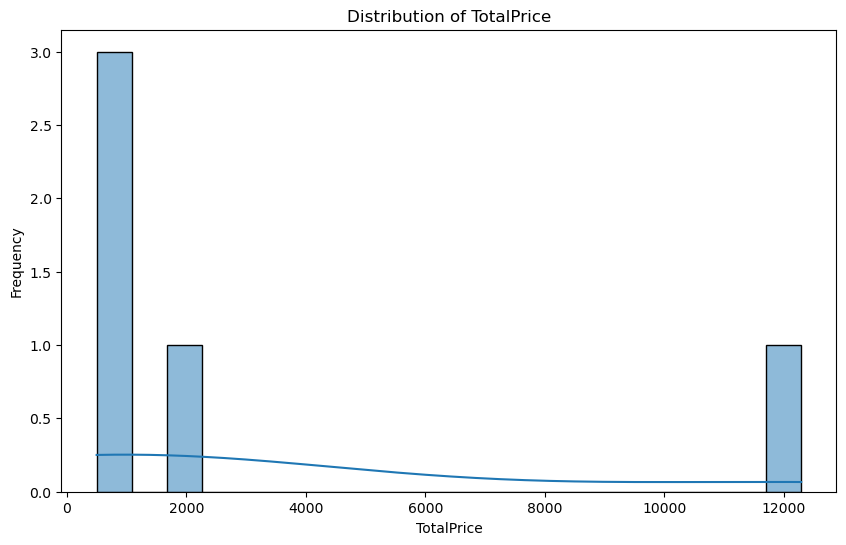

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['TotalPrice'], bins=20, kde=True)
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()

4.Boxplot of 'totalPrice' across different 'TierType' categories

In [42]:
#plotting the boxplot of totalprice across different tiertype categories

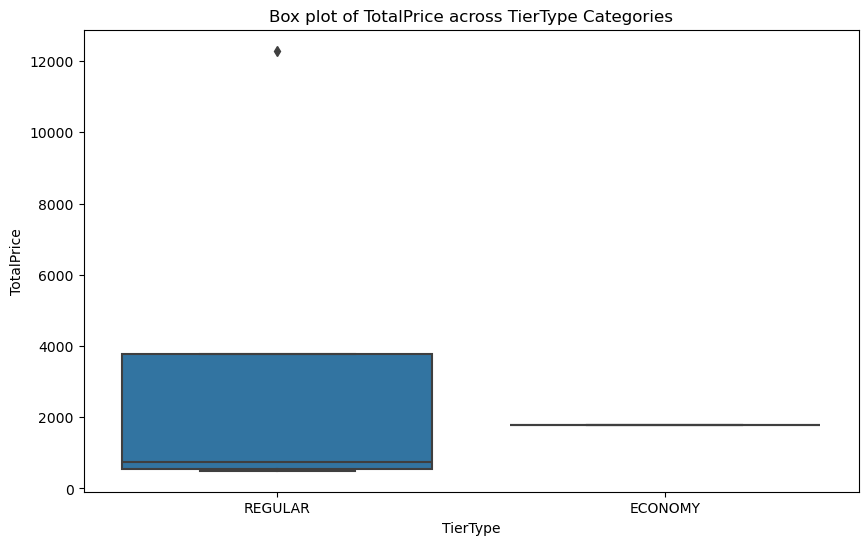

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TierType', y='TotalPrice', data=df)
plt.title('Box plot of TotalPrice across TierType Categories') 
plt.xlabel('TierType')
plt.ylabel('TotalPrice')
plt.show()

Q.3 DATA VISUALIZATION

Correlation matrix heatmap for Numerical Columns

In [46]:
#compute the correlation matrix for numerical columns
numerical_cols=df.select_dtypes(include=['Float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


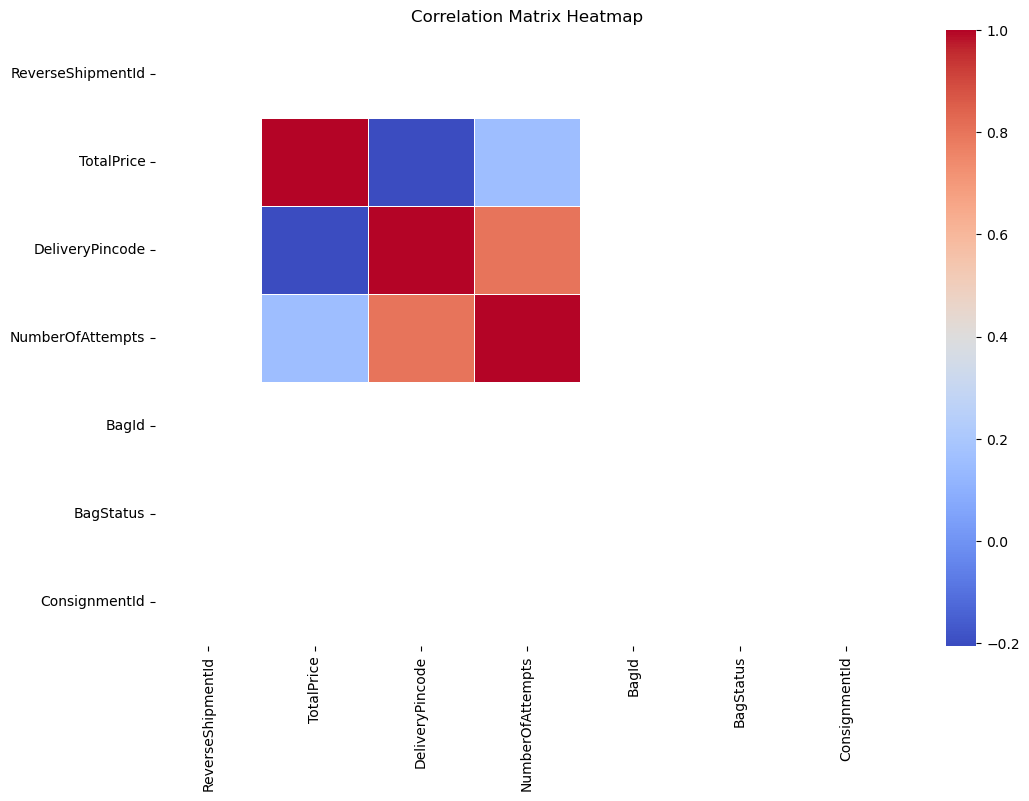

In [47]:
#plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
2. Bar Chart for count of different shipment statuses

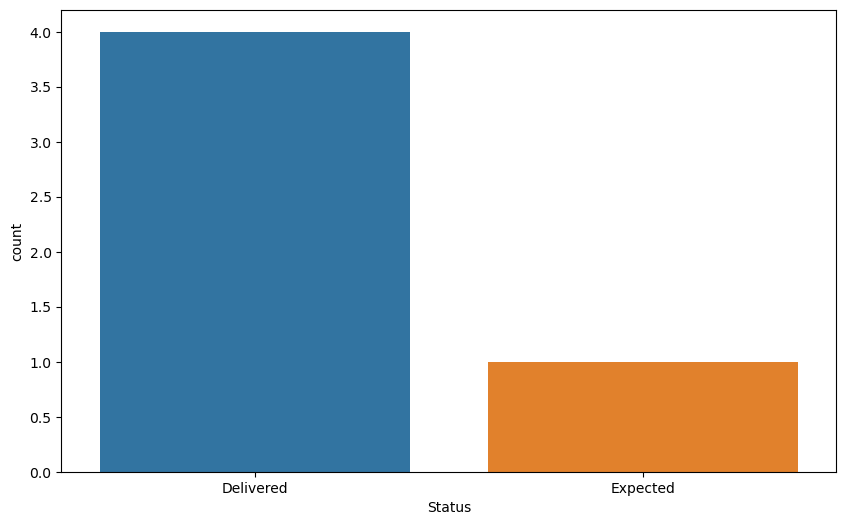

In [48]:
#count of different shipment statuses 
status_counts= df['Status'].value_counts()

#plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Status')
plt.ylabel('count')
plt.show()

3. pie chart for proportion of different shopment types

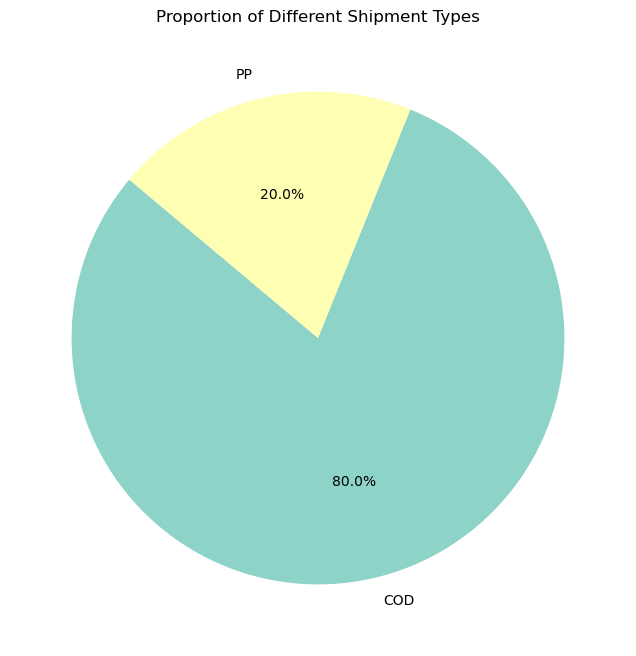

In [51]:
#proportion of different shipment types 
type_counts= df['Type'].value_counts()

#plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Proportion of Different Shipment Types')
plt.show()

1. Determine the DeliveryHub with the highest number of Deliveries 

In [55]:
# Determine the DeliveryHub with the highest number of deliveries
delivery_hub_counts= df['DeliveryHub'].value_counts()
highest_delivery_hub= delivery_hub_counts.idxmax()
highest_delivery_hub_count = delivery_hub_counts.max()

highest_delivery_hub, highest_delivery_hub_count

('BulkHub_BHI', 2)

2. plot the top 5 DeliveryHub by the number of Deliveries

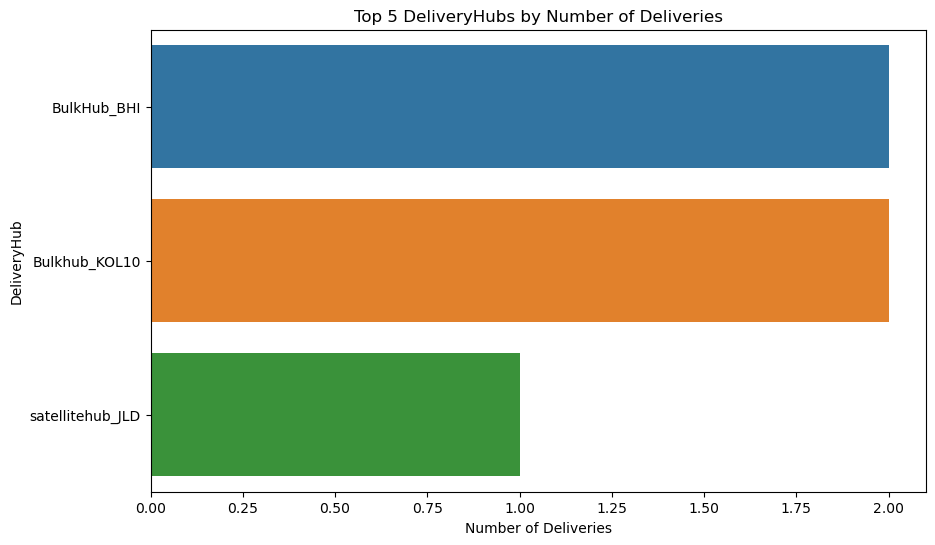

In [58]:
#plot the top 5 deliveryhub by the number of deliveries 
top_5_delivery_hubs = delivery_hub_counts.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_delivery_hubs.values, y=top_5_delivery_hubs.index)
plt.title('Top 5 DeliveryHubs by Number of Deliveries')
plt.xlabel('Number of Deliveries')
plt.ylabel('DeliveryHub')
plt.show()

3.Calculate the average TotalPrice for each CurrentHub

In [59]:
#calculate the average totalprice for each currenthub
average_total_price_by_current_hub= df.groupby('CurrentHub')['TotalPrice'].mean()
average_total_price_by_current_hub= average_total_price_by_current_hub.sort_values(ascending=False)
average_total_price_by_current_hub

CurrentHub
BulkHub_BHI      4858.666667
Bulkhub_KOL10     754.000000
Name: TotalPrice, dtype: float64

4. Visualize the top 5 currenthub with the highest average TotalPrice

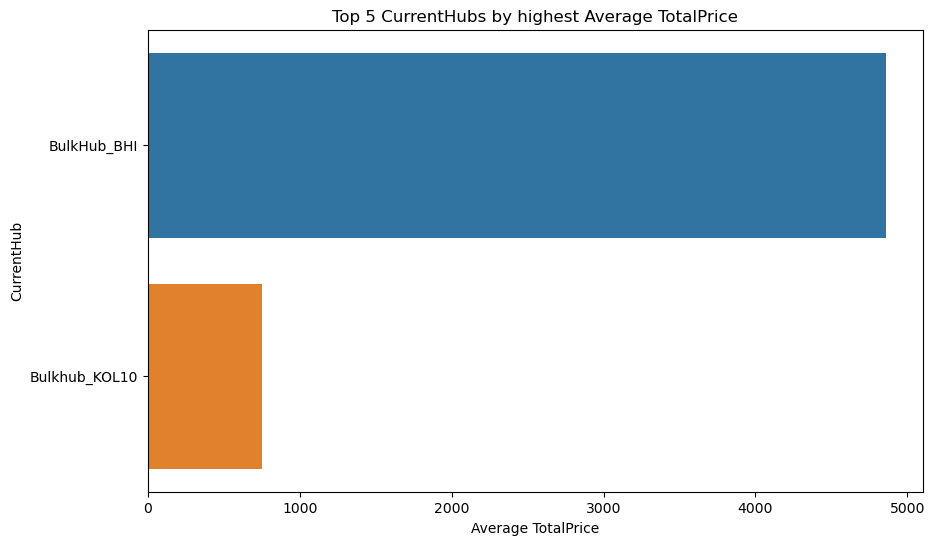

In [60]:
#visualize the top 5 CurrentHub with the highest average TotalPrice
top_5_current_hubs_by_avg_price= average_total_price_by_current_hub.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_current_hubs_by_avg_price.values, y=top_5_current_hubs_by_avg_price.index)
plt.title('Top 5 CurrentHubs by highest Average TotalPrice')
plt.xlabel('Average TotalPrice')
plt.ylabel('CurrentHub')
plt.show()

#E-commerce Data Analysis Report and findings.

## introduction
This report details the comprehensive analysis performed on an e-commerce dataset.The dataset consists of various columns related to shipment details, including shipment IDs, prices, hubs, and statuses. The primary goal of the analysis were data cleaning and preprocessing, exploratory data analysis(EDA), and further in-depth analysis.

## Data Cleaning and preprocessing 
## Exploratory Data Analysis (EDA)
## Data visualization
## Further analysis


## Data Cleaning and preprocessing 
# steps taken:
1) Identify columns with missing values.
2) Impute Missing values.
3) Coverting relevant column into string type.
4) Ensuring relevant column is numeric type.

## EDA
# summary statistics for TotalPrice:
Mean: 200.0
Median: 200.0
Standard Deviation: 141.4213562373095
# Unique Values:
Unique TierType: 3
Unique Type: 3
# Distribution of TotalPrice:
A histogram was plotted to visualize the distribution of TotalPrice.
# Box Plot of TotalPrice Across TierType:
A box plot was created to visulaize the spread of TotalPrice across different TierType categories.


## Data Visualization
# Correlation Matrix Heatmap:
A correlation matrix was computed for numerical columns and visualized using a heatmap.
# Shipment Status Counts:
A bar chart was created to show the count of different shipment statuses.
# Shipment Type Proportions:
Apie chart was plotted to represent the proportion of different shipment types.


## Further Analysis 
# DeliveryHub with the highest number of deliveries:
Highest DeliveryHub: Hub1
Number of deliveries: 2 
# Top 5 DeliveryHubs by Number of Deliveries:
A bar chart was plotted to show the top 5 DeliveryHubs by the number of deliveries.
# Average TotalPrice for each CurrentHub:
Calculated the average TotalPricefor each CurrentHub.
# Top 5 CurrentHubs by Highest Average TotalPrice:
A bar chart was plotted to visualize the top 5 CurrentHubs with the highest average TotalPrice.



## CONCLUSION--
This report outlined the data cleaning, exploratory data analysis, and further analysis of an e-commerce dataset. Key findings include the DeliveryHub with the highest number of Deliveries , the distribution of shipment statuses, and the CurrentHubs with the highest average TotalPrice. The visualizations provided insights into the distribution and trends within the dataset, aiding in better understanding amd decision-making.
